<a href="https://colab.research.google.com/github/IT24102008/PG151MLProject/blob/IT24102131/It24102131_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initial Code**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/preprocessed_stroke_data.csv')
display(df.head())

,0,1,2,3,4,5,6,7,8,9,stroke
0,2.305606,1.264816,0.250546,-0.430617,0.834524,0.333307,0.320894,-0.643058,-0.062396,-0.212238,1
1,1.453986,1.647613,-0.484745,0.160239,-1.163737,-0.412336,-0.231320,0.114952,0.208955,-0.247852,1
2,1.571330,-0.416363,-0.638432,0.597845,0.169697,-0.612380,0.748779,0.043821,-0.296528,-0.280570,1
3,1.537974,1.474840,0.641771,0.057266,0.514872,0.671681,-0.587822,0.692612,0.170372,-0.125929,1
4,1.642192,1.709071,-1.520156,0.258872,-1.103096,-0.424797,-0.188216,0.153761,-0.201548,0.639121,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4088, 10)
Shape of X_test: (1022, 10)
Shape of y_train: (4088,)
Shape of y_test: (1022,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9043 - loss: 0.4925 - val_accuracy: 0.9548 - val_loss: 0.2030
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9534 - loss: 0.1939 - val_accuracy: 0.9548 - val_loss: 0.1679
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9540 - loss: 0.1634 - val_accuracy: 0.9548 - val_loss: 0.1588
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9549 - loss: 0.1575 - val_accuracy: 0.9548 - val_loss: 0.1543
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9606 - loss: 0.1392 - val_accuracy: 0.9548 - val_loss: 0.1515
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9574 - loss: 0.1368 - val_accuracy: 0.9548 - val_loss: 0.1507
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9506 - loss: 0.1553 - val_accuracy: 0.9548 - val_loss: 0.1505
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9575 - loss: 0.1397 - val_accuracy: 0.9548 - val_loss:

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9405 - loss: 0.1968
Test Loss: 0.1931
Test Accuracy: 0.9393


***1 st Refined Code***


In [ ]:
# ============================================
# Stroke Prediction using Neural Network (MLP)
# Improved version with class balancing & metrics
# ============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# 1. Load and split the dataset
# -----------------------------
df = pd.read_csv('/content/preprocessed_stroke_data.csv')

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# -----------------------------
# 2. Feature scaling
# -----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# 3. Handle class imbalance
# -----------------------------
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# -----------------------------
# 4. Build improved model
# -----------------------------
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# 5. Add EarlyStopping
# -----------------------------
early_stop = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# -----------------------------
# 6. Train model
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

# -----------------------------
# 7. Evaluate model
# -----------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

# -----------------------------
# 8. Detailed evaluation
# -----------------------------
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

auc = roc_auc_score(y_test, y_pred_probs)
print(f"\nROC-AUC Score: {auc:.4f}")


Shape of X_train: (4088, 10)
Shape of X_test: (1022, 10)
Class Weights: {0: np.float64(0.5255849832861919), 1: np.float64(10.271356783919598)}
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5326 - loss: 0.8108 - val_accuracy: 0.6907 - val_loss: 0.6363
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5663 - loss: 0.6218 - val_accuracy: 0.7677 - val_loss: 0.5353
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6053 - loss: 0.6362 - val_accuracy: 0.7836 - val_loss: 0.4875
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6365 - loss: 0.6249 - val_accuracy: 0.7702 - val_loss: 0.4842
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6374 - loss: 0.6171 - val_accuracy: 0.7604 - val_loss: 0.4823
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6702 - loss: 0.5377 - val_accuracy: 0.7506 - val_loss: 0.4844
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6752 - loss: 0.5324 - val_accuracy: 0.7433 - val_loss: 0.4881
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6881 - loss: 0.5322 - val_accuracy: 0.7323 - val_loss: 0.4952
Ep

**2 nd Refined Code**

In [ ]:
# ======================================================
# Stroke Prediction using Neural Network (MLP)
# Improved version with SMOTE and threshold tuning
# ======================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# -----------------------------
# 1. Load and split the dataset
# -----------------------------
df = pd.read_csv('/content/preprocessed_stroke_data.csv')

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# -----------------------------
# 2. Handle imbalance with SMOTE
# -----------------------------
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After SMOTE:", X_train_res.shape, "Labels distribution:", np.bincount(y_train_res))

# -----------------------------
# 3. Feature scaling
# -----------------------------
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# -----------------------------
# 4. Build improved MLP model
# -----------------------------
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_res.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0008)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# 5. Train with EarlyStopping
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

history = model.fit(
    X_train_res, y_train_res,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# -----------------------------
# 6. Evaluate
# -----------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

# -----------------------------
# 7. Predictions and metrics
# -----------------------------
y_pred_probs = model.predict(X_test).ravel()

# Find optimal threshold to balance precision and recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_thresh = thresholds[np.argmax(f1_scores)]
print(f"\n🔹 Best threshold based on F1-score: {best_thresh:.3f}")

y_pred = (y_pred_probs > best_thresh).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

auc = roc_auc_score(y_test, y_pred_probs)
print(f"\nROC-AUC Score: {auc:.4f}")


Shape of X_train: (4088, 10)
Shape of y_train: (4088,)
After SMOTE: (7778, 10) Labels distribution: [3889 3889]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5858 - loss: 0.7130 - val_accuracy: 0.6806 - val_loss: 0.6717
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7102 - loss: 0.5415 - val_accuracy: 0.8335 - val_loss: 0.5850
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7450 - loss: 0.4926 - val_accuracy: 0.8843 - val_loss: 0.5097
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7652 - loss: 0.4692 - val_accuracy: 0.8914 - val_loss: 0.4860
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7633 - loss: 0.4618 - val_accuracy: 0.9030 - val_loss: 0.4700
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7523 - loss: 0.4671 - val_accuracy: 0.9062 - val_loss: 0.4583
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7670 - loss: 0.4452 - val_accuracy: 0.9165 - val_loss: 0.4342
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7753 - loss: 0.4351 - val_accuracy: 0.9177 - val_lo

**3 rd Revined Code**

After SMOTE: [3889 3889]
Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6151 - loss: 0.0824 - val_accuracy: 0.8181 - val_loss: 0.0340 - learning_rate: 0.0010
Epoch 2/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6958 - loss: 0.0455 - val_accuracy: 0.8882 - val_loss: 0.0293 - learning_rate: 0.0010
Epoch 3/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7307 - loss: 0.0363 - val_accuracy: 0.8985 - val_loss: 0.0296 - learning_rate: 0.0010
Epoch 4/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7394 - loss: 0.0326 - val_accuracy: 0.9338 - val_loss: 0.0268 - learning_rate: 0.0010
Epoch 5/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7551 - loss: 0.0306 - val_accuracy: 0.9126 - val_loss: 0.0293 - learning_rate: 0.0010
Epoch 6/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7688 - loss: 0.0290 - val_accuracy: 0.9486 - val_loss: 0.0271 - learning_rate: 0.0010
Epoch 7/60
93/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7728 - loss: 0.0280
Epoch 7: ReduceLROnPlateau 

/tmp/ipython-input-4017099.py:112: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


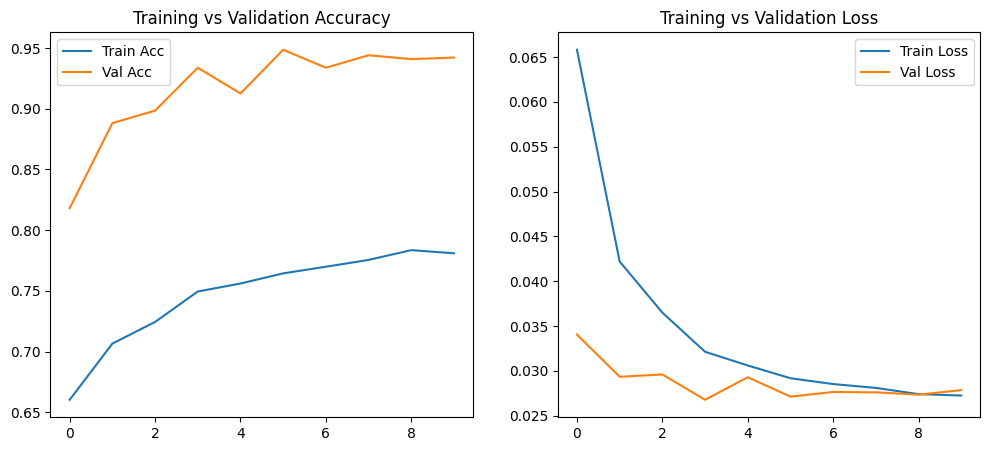

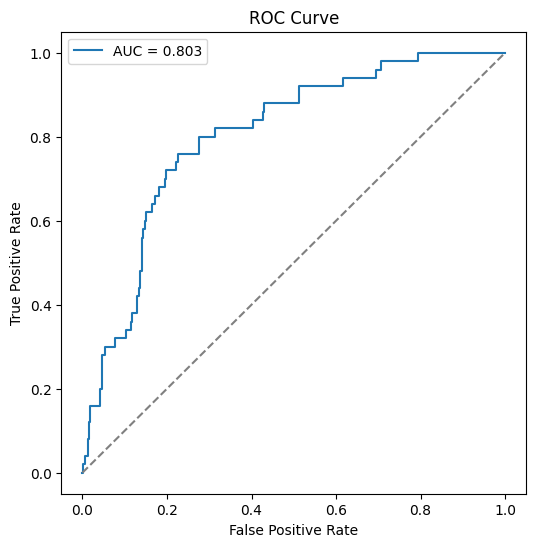

In [ ]:
# ======================================================
# Stroke Prediction using Neural Network (MLP)
# Final Optimized Version – Focal Loss + Visualizations
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, precision_recall_curve, roc_curve
)
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# -----------------------------
# 1. Load and prepare data
# -----------------------------
df = pd.read_csv('/content/preprocessed_stroke_data.csv')

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 2. Handle imbalance using SMOTE
# -----------------------------
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After SMOTE:", np.bincount(y_train_res))

# -----------------------------
# 3. Feature scaling
# -----------------------------
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# -----------------------------
# 4. Define Focal Loss function
# -----------------------------
def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
        bce_exp = tf.exp(-bce)
        focal_loss = alpha * (1 - bce_exp) ** gamma * bce
        return tf.reduce_mean(focal_loss)
    return focal_loss_fixed

# -----------------------------
# 5. Build improved MLP model
# -----------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=focal_loss(), metrics=['accuracy'])

# -----------------------------
# 6. Callbacks
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

# -----------------------------
# 7. Train the model
# -----------------------------
history = model.fit(
    X_train_res, y_train_res,
    epochs=60,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# -----------------------------
# 8. Evaluate
# -----------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

# -----------------------------
# 9. Predictions and threshold tuning
# -----------------------------
y_pred_probs = model.predict(X_test).ravel()
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_thresh = thresholds[np.argmax(f1_scores)]
print(f"\n🔹 Best threshold based on F1-score: {best_thresh:.3f}")

y_pred = (y_pred_probs > best_thresh).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

auc = roc_auc_score(y_test, y_pred_probs)
print(f"\nROC-AUC Score: {auc:.4f}")

# -----------------------------
# 10. Visualization
# -----------------------------
# Plot training curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**4 th Refined**

After SMOTE: [3889 3889]
Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6785 - loss: 0.6125 - val_accuracy: 0.7371 - val_loss: 0.6292 - learning_rate: 0.0010
Epoch 2/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7628 - loss: 0.4764 - val_accuracy: 0.8695 - val_loss: 0.5241 - learning_rate: 0.0010
Epoch 3/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7768 - loss: 0.4498 - val_accuracy: 0.9235 - val_loss: 0.4397 - learning_rate: 0.0010
Epoch 4/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7941 - loss: 0.4198 - val_accuracy: 0.9428 - val_loss: 0.3805 - learning_rate: 0.0010
Epoch 5/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7995 - loss: 0.4001 - val_accuracy: 0.9396 - val_loss: 0.3926 - learning_rate: 0.0010
Epoch 6/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7992 - loss: 0.3918 - val_accuracy: 0.9550 - val_loss: 0.3182 - learning_rate: 0.0010
Epoch 7/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8137 - loss: 0.3899 - val_accuracy: 0.9486 - va

/tmp/ipython-input-893916891.py:97: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


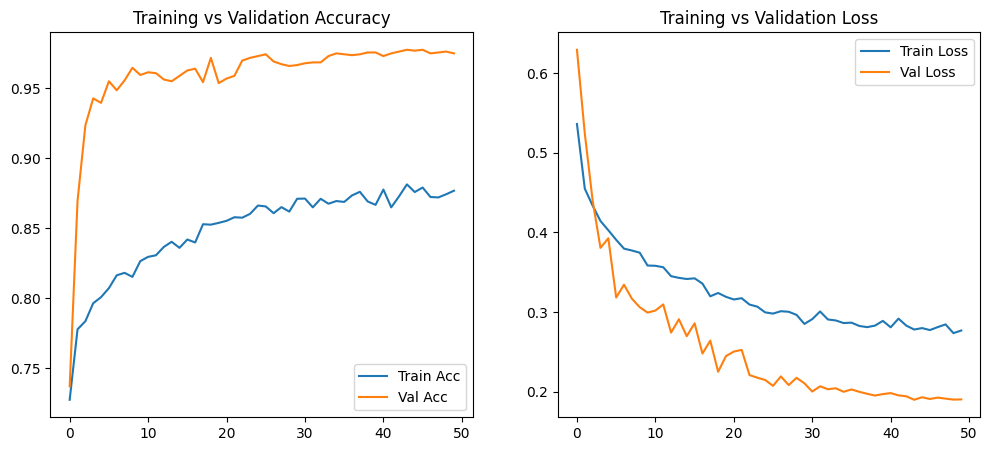

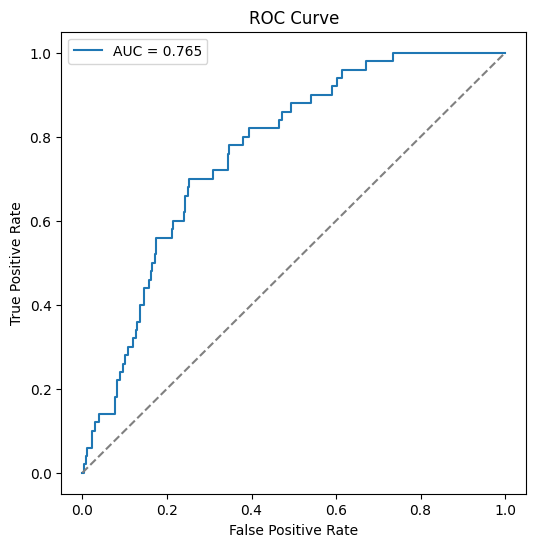

In [ ]:
# ======================================================
# Stroke Prediction using Neural Network (MLP)
# Final Balanced & Reliable Version
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, precision_recall_curve, roc_curve)
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# -----------------------------
# 1. Load and prepare data
# -----------------------------
df = pd.read_csv('/content/preprocessed_stroke_data.csv')

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 2. Handle imbalance using SMOTE
# -----------------------------
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After SMOTE:", np.bincount(y_train_res))

# -----------------------------
# 3. Feature scaling
# -----------------------------
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# -----------------------------
# 4. Build MLP model
# -----------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# 5. Callbacks
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# -----------------------------
# 6. Train the model
# -----------------------------
history = model.fit(
    X_train_res, y_train_res,
    epochs=60,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# -----------------------------
# 7. Evaluate
# -----------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

# -----------------------------
# 8. Predictions and threshold tuning
# -----------------------------
y_pred_probs = model.predict(X_test).ravel()
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_thresh = thresholds[np.argmax(f1_scores)]
print(f"\n🔹 Best threshold based on F1-score: {best_thresh:.3f}")

y_pred = (y_pred_probs > best_thresh).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

auc = roc_auc_score(y_test, y_pred_probs)
print(f"\nROC-AUC Score: {auc:.4f}")

# -----------------------------
# 9. Visualization
# -----------------------------
# Training curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**5 th Refined Code**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from imblearn.over_sampling import SMOTE

# Load data
df = pd.read_csv('/content/preprocessed_stroke_data.csv')

# Split features and labels
X = df.drop('stroke', axis=1)
y = df['stroke']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Define model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

# Predictions
y_pred_proba = model.predict(X_test).ravel()

# Find best threshold based on F1
thresholds = np.arange(0.1, 0.9, 0.01)
best_thresh, best_f1 = 0, 0
for t in thresholds:
    preds = (y_pred_proba >= t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1, best_thresh = f1, t

print(f"\n🔹 Best threshold based on F1-score: {best_thresh:.3f}")

# Final predictions
y_pred = (y_pred_proba >= best_thresh).astype(int)

# Confusion matrix & report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6780 - loss: 0.6041 - val_accuracy: 0.8040 - val_loss: 0.4356
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7931 - loss: 0.4557 - val_accuracy: 0.8156 - val_loss: 0.4148
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7967 - loss: 0.4408 - val_accuracy: 0.8220 - val_loss: 0.4079
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8117 - loss: 0.4231 - val_accuracy: 0.8194 - val_loss: 0.3991
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8168 - loss: 0.4117 - val_accuracy: 0.8233 - val_loss: 0.3917
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8172 - loss: 0.4083 - val_accuracy: 0.8265 - val_loss: 0.3843
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8243 - loss: 0.4022 - val_accuracy: 0.8290 - val_loss: 0.3791
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8414 - loss: 0.3747 - val_accuracy: 0.8361 - val_loss: